In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SameerBramhecha/LP-5/master/DL/1_boston_housing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, input_shape=X_train[0].shape, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

C:\Users\House\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 563.9803 - mae: 21.9203 
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 493.6516 - mae: 20.2594
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 411.4806 - mae: 18.0404
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 297.2687 - mae: 14.7080
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 172.4730 - mae: 10.7266
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 97.2948 - mae: 7.9687 1
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67.0676 - mae: 6.1965
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.1662 - mae: 4.7582
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.2887 - mae: 4.3939
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.9679 - mae: 3.5775
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.9915 - mae: 3.4309
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.9704 - mae: 3.3253
Epoch 13/100

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3320 - mae: 2.0325 
Epoch 72/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3197 - mae: 1.98943
Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9096 - mae: 1.9321  
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7239 - mae: 1.9548
Epoch 75/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8676 - mae: 1.9551  
Epoch 76/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5958 - mae: 1.9670 
Epoch 77/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3127 - mae: 1.9745  
Epoch 78/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4119 - mae: 1.9429 
Epoch 79/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4254 - mae: 1.9027
Epoch 80/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4497 - mae: 1.8633
Epoch 81/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5051 - mae: 2.0207
Epoch 82/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2821 - mae: 1.988622
Epoch 83/100
13/13 ━━━━━━━━━━

In [8]:
mse,mae = model.evaluate(X_test,y_test)
print(mse , '\n' , mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.2443 - mae: 2.0167
10.72270393371582 
 2.148181915283203


In [9]:
y_pred = model.predict(X_test)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[27.448795 ],
       [34.55806  ],
       [16.06824  ],
       [25.853659 ],
       [16.187128 ],
       [19.759758 ],
       [16.305542 ],
       [15.135212 ],
       [26.124254 ],
       [18.116314 ],
       [20.167753 ],
       [18.328875 ],
       [ 5.7589436],
       [18.311481 ],
       [18.527548 ],
       [22.174118 ],
       [20.139353 ],
       [ 9.214971 ],
       [46.22836  ],
       [13.6308975],
       [26.24824  ],
       [26.988451 ],
       [14.429281 ],
       [22.425884 ],
       [16.933756 ],
       [18.37573  ],
       [20.68403  ],
       [13.006801 ],
       [20.542242 ],
       [16.871807 ],
       [23.06743  ],
       [22.686556 ],
       [19.463938 ],
       [25.764942 ],
       [15.637554 ],
       [16.08972  ],
       [32.130215 ],
       [20.727545 ],
       [21.168232 ],
       [25.256067 ],
       [15.605299 ],
       [29.010937 ],
       [49.46169  ],
       [18.398493 ],
       [26.103428 ],
       [16.948515 ],
       [15.183272 ],
       [26.75

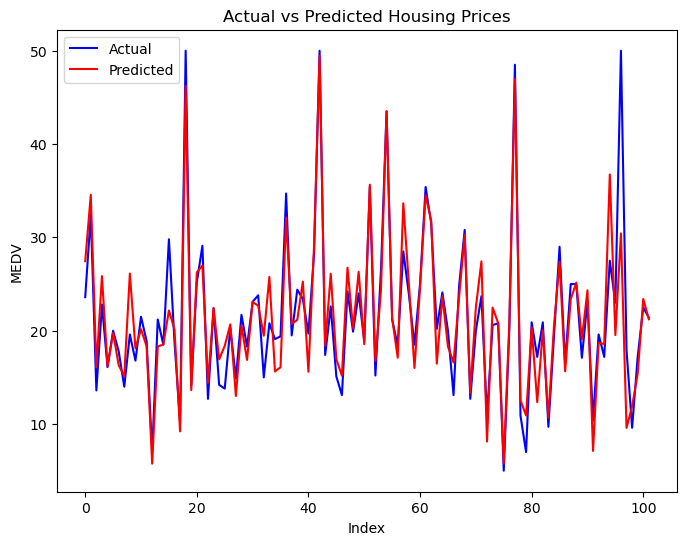

In [10]:
# Flatten prediction and reset index
y_test_np = y_test.reset_index(drop=True)
y_pred_np = y_pred.flatten()

# Now plot with aligned indices
plt.figure(figsize=(8,6))
plt.plot(y_test_np, label='Actual', color='blue')
plt.plot(y_pred_np, label='Predicted', color='red')
plt.legend()
plt.xlabel("Index")
plt.ylabel("MEDV")
plt.title("Actual vs Predicted Housing Prices")
plt.show()
